In [1]:
import numpy as np

# Bayes Nets Package
import kassandra
import model_viz as mv
import tensorflow as tf


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



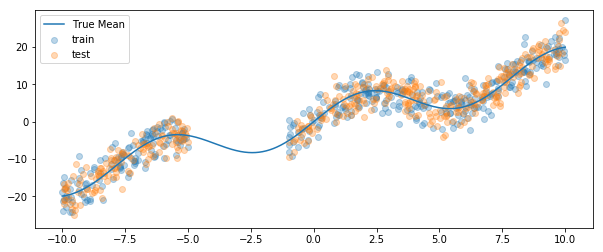

In [2]:
N = 500
l, u = -10, 10

# features
x_train = np.random.uniform(l, u, N)
x_test = np.random.uniform(l, u, N)

# missing data
x_train = x_train[np.where(np.logical_or(x_train>=-1.0, x_train<=-5.0))]
x_test = x_test[np.where(np.logical_or(x_test>=-1.0, x_test<=-5.0))]

# targets
y_train = 1.5*x_train + 5*np.sin(0.8*x_train) + np.random.normal(0, 3, x_train.shape[0])
y_test = 1.5*x_test + 5*np.sin(0.8*x_test) + np.random.normal(0, 3, x_test.shape[0])

x_true = np.linspace(l, u, 1000)
y_true = 1.5*x_true + 5*np.sin(0.8*x_true)

mv.demo_plot(x_train, y_train, x_test, y_test, x_true, y_true)

In [3]:
model = kassandra.models.MLP(layers=2, 
                             units=50, 
                             activation=tf.nn.tanh,
                             dropout_rate=0.5)

model.train(x_train, y_train, epochs=5000, shuffle=True, minibatches = 10)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use tf.cast instead.


Elapsed time: 2.56s


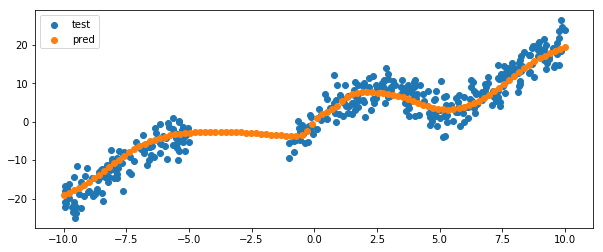

In [4]:
x = np.linspace(l, u, 100)
mv.mlp_plots(model, x, x_test, y_test)